In [1]:
# R code 3.1
PrPV <- 0.95
PrPM <- 0.01
PrV <- 0.001
PrP <- PrPV*PrV + PrPM*(1-PrV)
( PrVP <- PrPV*PrV / PrP )

[1] 0.08683729

In [2]:
## R code 3.2
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)

In [3]:
## R code 3.3
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )

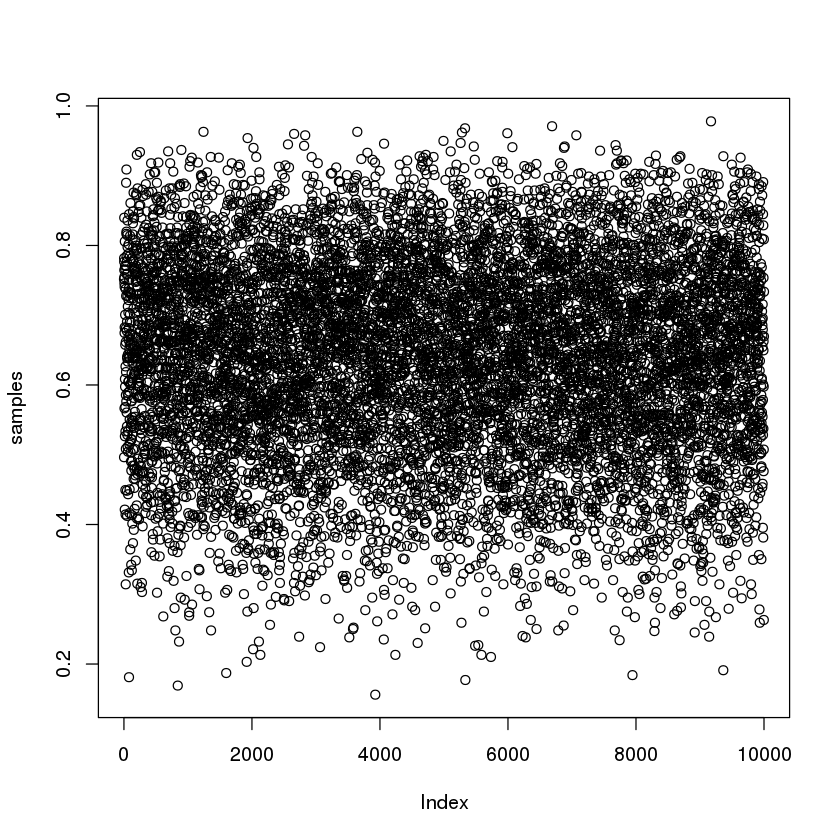

In [4]:
## R code 3.4
plot( samples )

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


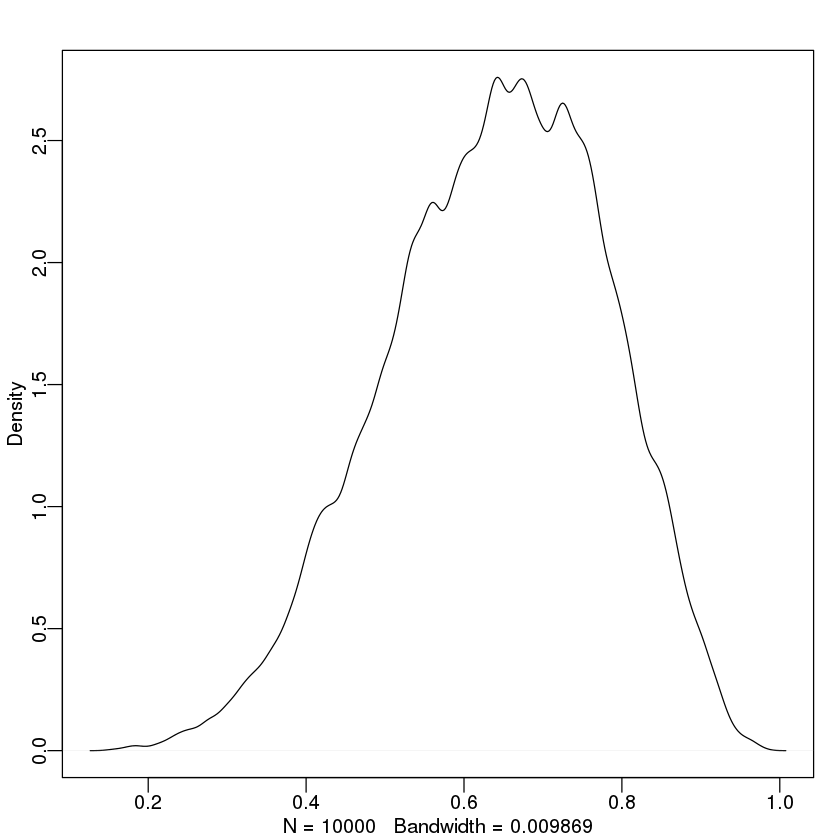

In [5]:
## R code 3.5
library(rethinking)
dens( samples )

In [6]:
## R code 3.6
# add up posterior probability where p < 0.5
sum( posterior[ p_grid < 0.5 ] )

[1] 0.1718746

In [7]:
## R code 3.7
sum( samples < 0.5 ) / 1e4

[1] 0.1682

In [8]:
## R code 3.8
sum( samples > 0.5 & samples < 0.75 ) / 1e4

[1] 0.6034

In [9]:
## R code 3.9
quantile( samples , 0.8 )

80% 
0.7617618

In [10]:
## R code 3.10
quantile( samples , c( 0.1 , 0.9 ) )

10%       90% 
0.4504505 0.8128128

In [11]:
## R code 3.11
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep(1,1000)
likelihood <- dbinom( 3 , size=3 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
samples <- sample( p_grid , size=1e4 , replace=TRUE , prob=posterior )

In [12]:
## R code 3.12
PI( samples , prob=0.5 )

25%       75% 
0.7077077 0.9299299

In [13]:
## R code 3.13
HPDI( samples , prob=0.5 )

|0.5      0.5| 
0.8378378 0.9989990

In [14]:
## R code 3.14
p_grid[ which.max(posterior) ]

[1] 1

In [15]:
## R code 3.15
chainmode( samples , adj=0.01 )

[1] 0.9840174

In [16]:
## R code 3.16
mean( samples )
median( samples )

[1] 0.7997813

[1] 0.8388388

In [17]:
## R code 3.17
sum( posterior*abs( 0.5 - p_grid ) )

[1] 0.3128752

In [18]:
## R code 3.18
loss <- sapply( p_grid , function(d) sum( posterior*abs( d - p_grid ) ) )

In [19]:
## R code 3.19
p_grid[ which.min(loss) ]

[1] 0.8408408

In [20]:
## R code 3.20
dbinom( 0:2 , size=2 , prob=0.7 )

[1] 0.09 0.42 0.49

In [21]:
## R code 3.21
rbinom( 1 , size=2 , prob=0.7 )

[1] 2

In [22]:
## R code 3.22
rbinom( 10 , size=2 , prob=0.7 )

[1] 1 1 0 2 1 0 1 1 1 2

In [23]:
## R code 3.23
dummy_w <- rbinom( 1e5 , size=2 , prob=0.7 )
table(dummy_w)/1e5

dummy_w
      0       1       2 
0.08998 0.41944 0.49058 

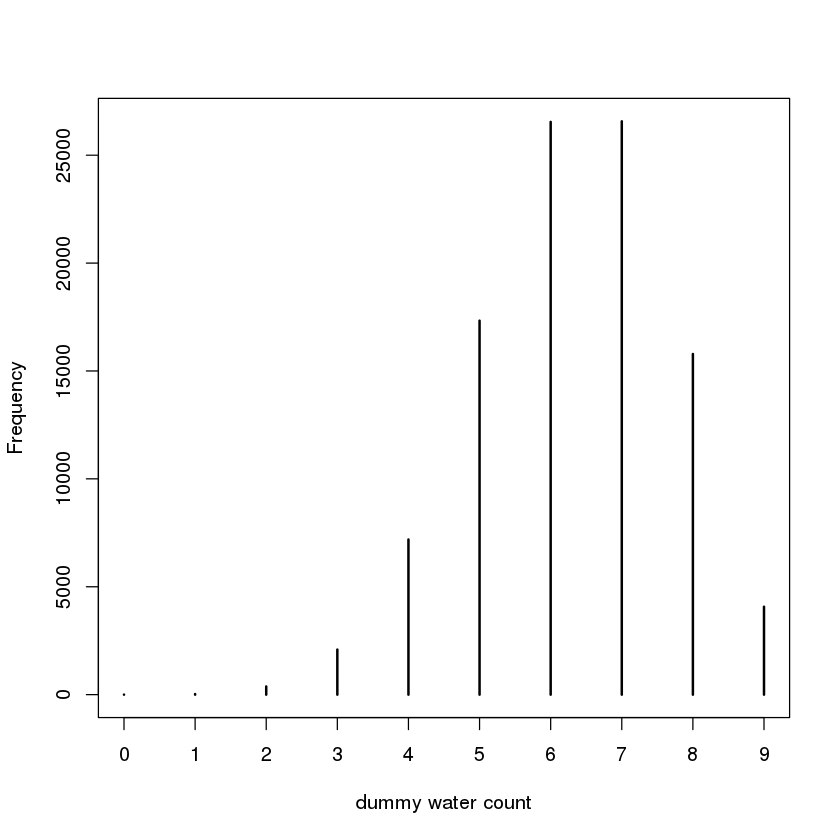

In [24]:
## R code 3.24
dummy_w <- rbinom( 1e5 , size=9 , prob=0.7 )
simplehist( dummy_w , xlab="dummy water count" )

In [25]:
## R code 3.25
w <- rbinom( 1e4 , size=9 , prob=0.6 )

In [26]:
## R code 3.26
w <- rbinom( 1e4 , size=9 , prob=samples )

In [27]:
## R code 3.27
p_grid <- seq( from=0 , to=1 , length.out=1000 )
prior <- rep( 1 , 1000 )
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample( p_grid , prob=posterior , size=1e4 , replace=TRUE )

In [28]:
## R code 3.28
birth1 <- c(1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1)
birth2 <- c(0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0)

In [29]:
## R code 3.29
library(rethinking)
data(homeworkch3)

In [30]:
## R code 3.30
sum(birth1) + sum(birth2)

[1] 111